#Introducción
Platzi -Escuela de Ciencia de Datos 

*Estadística descriptiva*


-----


Aquí empezamos con la limpieza de datos y *feature engineering* 

In [ ]:
print("hi")

hi


Si no tienes el acceso directo de noteboook este es el [link](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo?hl=en) 

# Llamar los datos 

In [ ]:
#Llamamos el set de datos público 
Chicago_data = 'https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/Traffic_Crashes1.csv'

token_map_plot='pk.eyJ1IjoiY2hlbWlza3kiLCJhIjoiY2tnOGNhcXk3MGZ3eDJ5b2FxZ3ViajN1MyJ9.t3R24lWTwzTQwyJw4vuWFw'

In [ ]:
import pandas as pd 

In [ ]:
Chicago_df=pd.read_csv(Chicago_data)

In [ ]:
Chicago_df.head()

Unnamed: 0  ...   date_real
0      290702  ...  2017-02-14
1      405524  ...  2019-08-13
2      261834  ...  2019-05-22
3       38519  ...  2017-06-14
4      420197  ...  2018-05-03

[5 rows x 51 columns]

*Transformaciones* básicas  

In [ ]:
Chicago_df.describe()

Unnamed: 0  POSTED_SPEED_LIMIT  ...      LATITUDE     LONGITUDE
count   27961.000000        27961.000000  ...  27800.000000  27800.000000
mean   223994.700976           28.250277  ...     41.854875    -87.669008
std    129369.418879            6.534930  ...      0.443161      0.912675
min         5.000000            0.000000  ...      0.000000    -87.933994
25%    112646.000000           30.000000  ...     41.786318    -87.721236
50%    223910.000000           30.000000  ...     41.876850    -87.673489
75%    336419.000000           30.000000  ...     41.924793    -87.632824
max    447370.000000           99.000000  ...     42.022580      0.000000

[8 rows x 18 columns]

Trabajando con fechas 

In [ ]:
Chicago_df['CRASH_DATE'] = Chicago_df['CRASH_DATE'].apply(lambda x: pd.to_datetime(x,
errors='coerce', utc=True))

In [ ]:
import plotly.express as px
px.set_mapbox_access_token(token_map_plot)


In [ ]:
df = px.data.carshare()
fig = px.scatter_mapbox(Chicago_df, lat="LATITUDE", lon="LONGITUDE",     color="CRASH_HOUR", size="NUM_UNITS",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()

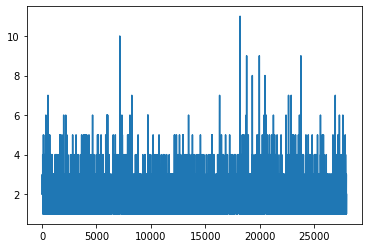

In [ ]:
Chicago_df["NUM_UNITS"].plot()

In [ ]:
import scipy.stats as ss

In [ ]:
 ss.variation(Chicago_df["NUM_UNITS"])


0.21794501057510543

In [ ]:
import matplotlib.pyplot as plt

(array([1.4740e+03, 2.4646e+04, 1.4720e+03, 2.5900e+02, 7.6000e+01,
        2.1000e+01, 6.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

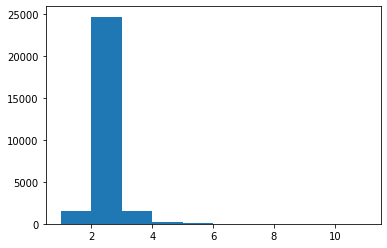

In [ ]:
plt.hist(Chicago_df["NUM_UNITS"])

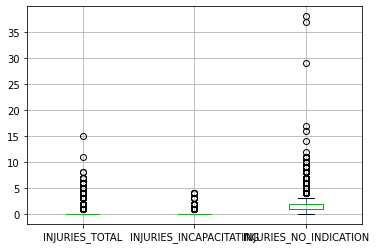

In [ ]:
Chicago_df.boxplot(column=['INJURIES_TOTAL', 'INJURIES_INCAPACITATING', 'INJURIES_NO_INDICATION'])

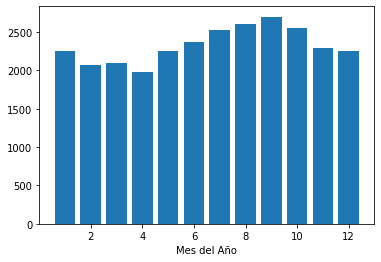

In [ ]:
tab = pd.crosstab(index=Chicago_df["CRASH_MONTH"],columns="frecuencia")

plt.bar(tab.index,tab["frecuencia"])
plt.xlabel("Mes del Año")
plt.savefig("accidentes.png")
